In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device('cuda:2')

In [3]:
from utils.test_utils import obtain_AL_ckpts, split_AL_loaders
from utils.test_utils import load_AL_config, load_AL_dataloader, load_test_model

In [4]:
save_dir = '../results/simulation/220226_1354'
config_file, state_list, data_files = obtain_AL_ckpts(save_dir)

unknown file:  train_AL_valid.txt
unknown file:  .ipynb_checkpoints


In [5]:
print(state_list, data_files)

['binaryNN_0.pt', 'binaryNN_1.pt', 'binaryNN_2.pt', 'binaryNN_3.pt', 'binaryNN_4.pt', 'binaryNN_5.pt', 'binaryNN_6.pt', 'binaryNN_7.pt', 'binaryNN_8.pt', 'binaryNN_9.pt'] ['test_loader.pkl', 'final_dataloader.pkl']


### load models and train data loaders

In [6]:
args = load_AL_config(save_dir, config_file)
dl_loader = load_AL_dataloader(args.save_dir,'final_dataloader.pkl')
test_loader = load_AL_dataloader(args.save_dir,'test_loader.pkl')

In [7]:
dl_loaders,dl_cum_loaders = split_AL_loaders(dl_loader, args)

/home/saerom/fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)


In [8]:
from utils.test_utils import test_groupwise, test_model

In [9]:
for it,st in enumerate(state_list):
    print("="*50)
    clf,clf_criterion = load_test_model(save_dir, st, args)
    _, acc = test_model(clf, dl_cum_loaders[it],clf_criterion, device, args.problem_type)
    _, acc2 = test_model(clf, test_loader,clf_criterion, device, args.problem_type)
    print("cumulated total training/test acc:", acc,"/",acc2)
    test_groupwise(clf, dl_cum_loaders[it],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print("test set performance")
    test_groupwise(clf, test_loader,clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print('-'*50)
    for i in range(it+1):
        _, acc = test_model(clf, dl_loaders[i],clf_criterion, device, args.problem_type)
        print("data loader",i, "acc:",acc)
        test_groupwise(clf, dl_loaders[i],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
        print("")

loaded model is binaryNN_0.pt


/home/saerom/fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)


cumulated total training/test acc: tensor(85.) / tensor(61.2827)
0.0 : loss 0.29612997174263 / acc 90.0
1.0 : loss 0.6647080183029175 / acc 73.33332824707031
test set performance
0.0 : loss 0.7879835963249207 / acc 62.866451263427734
1.0 : loss 0.7969292402267456 / acc 57.01754379272461
--------------------------------------------------
data loader 0 acc: tensor(85.)
0.0 : loss 0.29612997174263 / acc 90.0
1.0 : loss 0.6647080183029175 / acc 73.33332824707031

loaded model is binaryNN_1.pt
cumulated total training/test acc: tensor(91.6667) / tensor(65.0831)
0.0 : loss 0.26140880584716797 / acc 93.4065933227539
1.0 : loss 0.3756641447544098 / acc 87.80487823486328
test set performance
0.0 : loss 0.9240784049034119 / acc 65.4723129272461
1.0 : loss 0.9623439311981201 / acc 64.03508758544922
--------------------------------------------------
data loader 0 acc: tensor(89.)
0.0 : loss 0.3151114284992218 / acc 91.42857360839844
1.0 : loss 0.5056203007698059 / acc 83.33332824707031

data loade

cumulated total training/test acc: tensor(82.8652) / tensor(69.8337)
0.0 : loss 0.3935416638851166 / acc 82.35294342041016
1.0 : loss 0.3963189721107483 / acc 84.15841674804688
test set performance
0.0 : loss 0.6351637244224548 / acc 70.68403625488281
1.0 : loss 0.8100804090499878 / acc 67.54386138916016
--------------------------------------------------
data loader 0 acc: tensor(79.)
0.0 : loss 0.36500969529151917 / acc 81.42857360839844
1.0 : loss 0.5700756907463074 / acc 73.33332824707031

data loader 1 acc: tensor(81.2500)
0.0 : loss 0.579888105392456 / acc 80.95237731933594
1.0 : loss 0.4996790587902069 / acc 81.81818389892578

data loader 2 acc: tensor(75.)
0.0 : loss 0.5127092003822327 / acc 72.0
1.0 : loss 0.4256249964237213 / acc 85.71428680419922

data loader 3 acc: tensor(93.7500)
0.0 : loss 0.22228242456912994 / acc 92.59259033203125
1.0 : loss 0.08052843064069748 / acc 100.0

data loader 4 acc: tensor(84.3750)
0.0 : loss 0.3285748362541199 / acc 85.71428680419922
1.0 : los

In [10]:
from utils.data_utils import dataset_description, dl2nparray

data loader 0


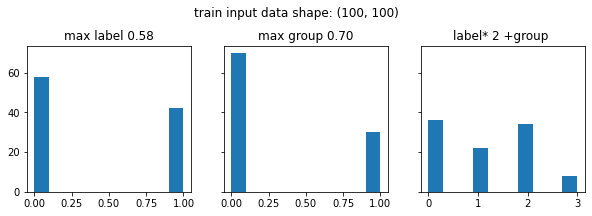

data loader 1


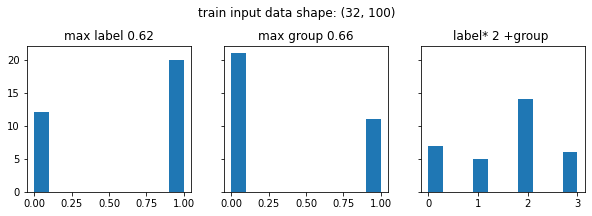

data loader 2


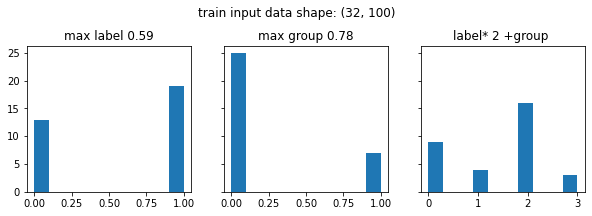

data loader 3


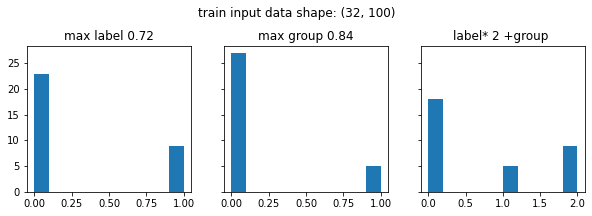

data loader 4


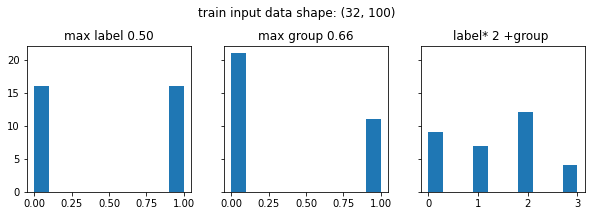

data loader 5


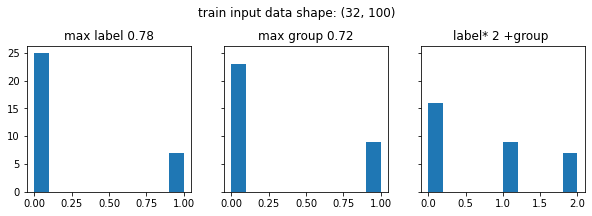

data loader 6


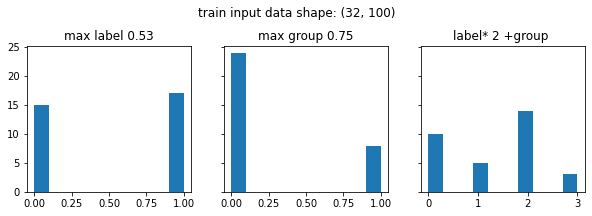

data loader 7


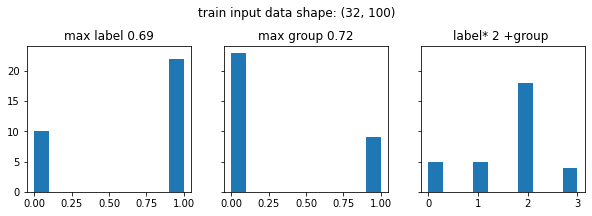

data loader 8


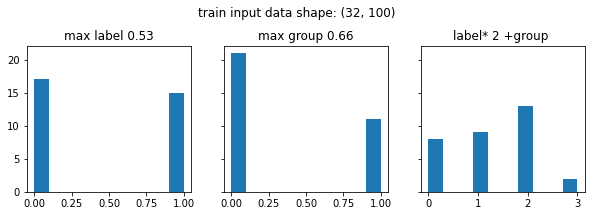

data loader 9


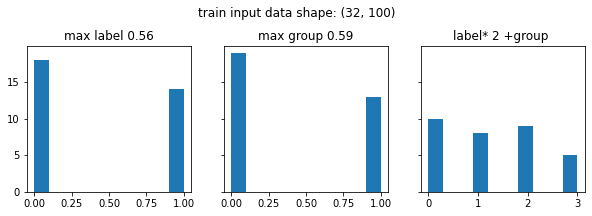

data loader 10


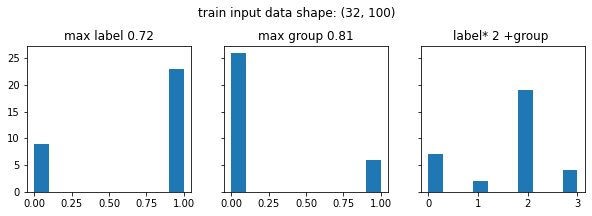

In [11]:
for i in range(len(dl_loaders)):
    print("data loader",i)
    x,y,z = dl2nparray(dl_loaders[i])
    dataset_description(x,y,z)

data cumulative loader 0


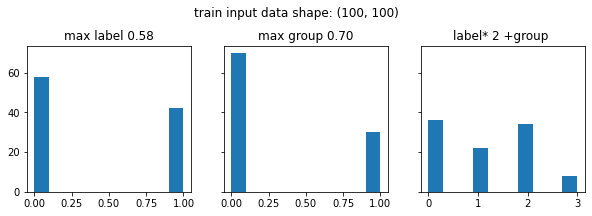

data cumulative loader 1


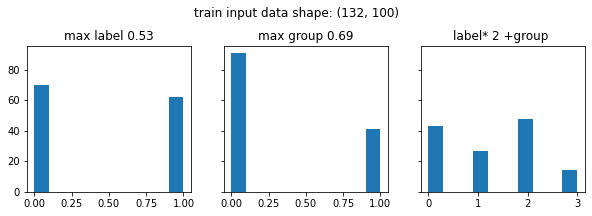

data cumulative loader 2


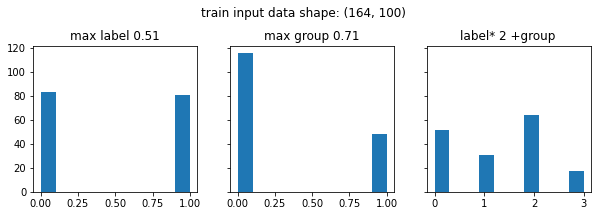

data cumulative loader 3


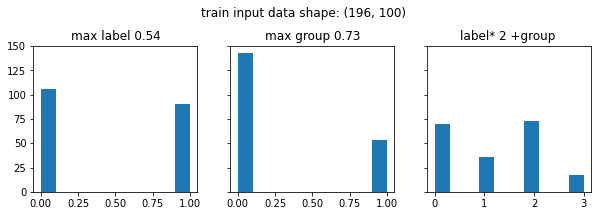

data cumulative loader 4


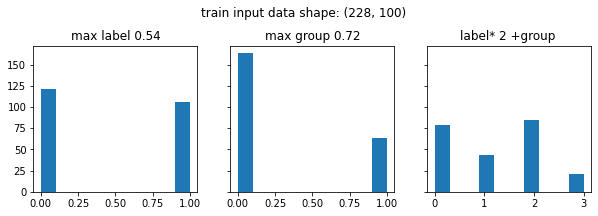

data cumulative loader 5


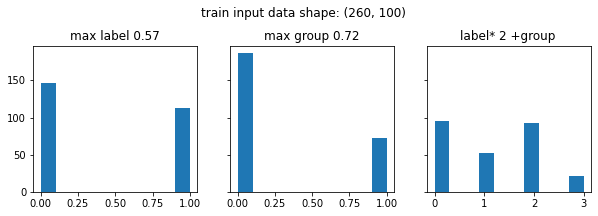

data cumulative loader 6


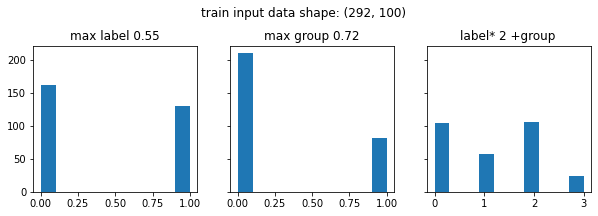

data cumulative loader 7


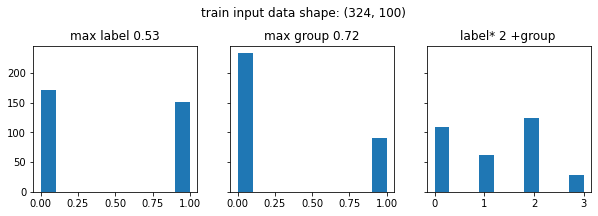

data cumulative loader 8


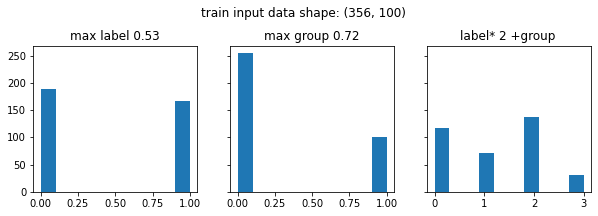

data cumulative loader 9


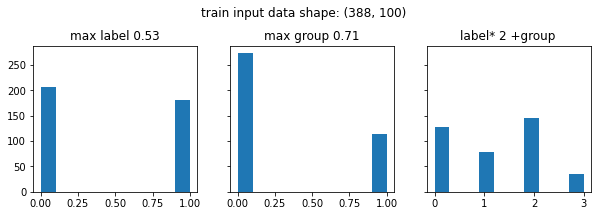

data cumulative loader 10


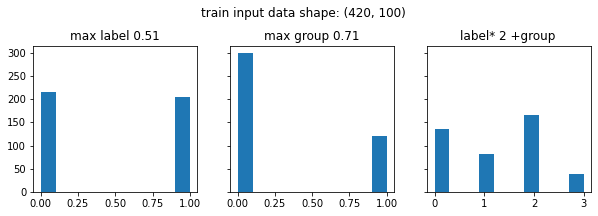

In [12]:
for i in range(len(dl_loaders)):
    print("data cumulative loader",i)
    x,y,z = dl2nparray(dl_cum_loaders[i])
    dataset_description(x,y,z)

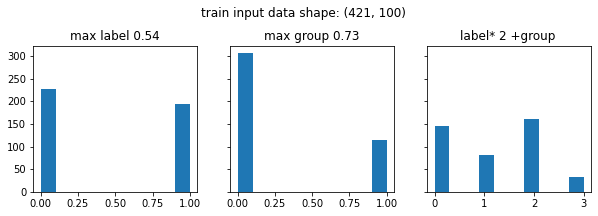

In [13]:
x,y,z = dl2nparray(test_loader)
dataset_description(x,y,z)